# Lab 3 - Part 2: PCA and Clustering (12 marks)
### Due Date: Monday, March 13 at 12pm

Author: Jean-Charl Pretorius

The purpose of this portion of the assignment is to practice using PCA and clustering techniques on a given dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def cluster_fn(X, n_clusters, n_components=0):
    '''Calculate silhouette score for a given dataset, number of clusters, 
       and number of principle components using Kmeans clustering (random_state=0)
        
        n_clusters (int): number of clusters to use for Kmeans
        n_components (int): number of principle components (optional)
        X (numpy.array or pandas.DataFrame): unlabelled dataset
        
        returns: silhouette score
    
    '''
    # TODO: Implement function body
    if (n_components):
        # perform PCA
        pca = PCA(n_components=n_components)
    
        # fit and transform the data on the pca components
        pca.fit(X)
        X = pca.transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    return score
    
    

## 1. Load data (2 marks)

For this assignment, we will use the dataset found below:

https://archive.ics.uci.edu/ml/datasets/Chemical+Composition+of+Ceramic+Samples

In [5]:
# TODO: Import dataset
ceramic_data = pd.read_csv('Chemical Composion of Ceramic.csv', na_values='?')

ceramic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

Two of the columns are non-numeric. For this assignment, we will remove those two columns and focus on clustering the ceramic samples based on the numerical measurements

In [6]:
# TODO: Remove non-numeric columns
ceramic_data.drop(columns=["Ceramic Name", "Part"], axis=1, inplace=True)
ceramic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Na2O    88 non-null     float64
 1   MgO     88 non-null     float64
 2   Al2O3   88 non-null     float64
 3   SiO2    88 non-null     float64
 4   K2O     88 non-null     float64
 5   CaO     88 non-null     float64
 6   TiO2    88 non-null     float64
 7   Fe2O3   88 non-null     float64
 8   MnO     88 non-null     int64  
 9   CuO     88 non-null     int64  
 10  ZnO     88 non-null     int64  
 11  PbO2    88 non-null     int64  
 12  Rb2O    88 non-null     int64  
 13  SrO     88 non-null     int64  
 14  Y2O3    88 non-null     int64  
 15  ZrO2    88 non-null     int64  
 16  P2O5    88 non-null     int64  
dtypes: float64(8), int64(9)
memory usage: 11.8 KB


## 2. Implement clustering (8 marks)

### 2.1 Cluster using raw data (1 mark)

Implement Kmeans clustering using the raw data. Compare the silhouette scores using 2, 3, 4, 5 and 6 clusters

In [21]:
# TODO: Implement clustering with raw data using cluster_fn above


sils = []
clusters_list = range(2, 7)
for n_clusters in clusters_list:
    cluster_fn(ceramic_data, n_clusters)
    sils.append(cluster_fn(ceramic_data, n_clusters))


### 2.2 Cluster using PCA-transformed data (2 marks)

Implement Kmeans clustering using the PCA-transformed data. Compare the silhouette scores using 2, 3, 4, 5 and 6 clusters and 2, 3, 4, 5 and 6 principle components 

In [34]:
# TODO: Implement clustering with PCA-transformed data using cluster_fn above
pca_components_list = range(2, 7)
clusters_list = range(2, 7)

pcas = {}

for n_components in pca_components_list:
    sils_scores = []
    for n_clusters in clusters_list:
        sil = cluster_fn(ceramic_data, n_clusters, n_components)
        sils_scores.append(sil)
    pcas[n_components] = sils_scores

### 2.3 Display results (2 marks)

Print the results for 2.1 and 2.2 in a table. Include column and row labels

In [23]:
# TODO: Display results
#2.1)
df_sils = pd.DataFrame({'n_clusters': clusters_list, 'silhouette': sils})
df_sils


,n_clusters,silhouette
0,2,0.584013
1,3,0.561640
2,4,0.543411
3,5,0.508064
4,6,0.510399


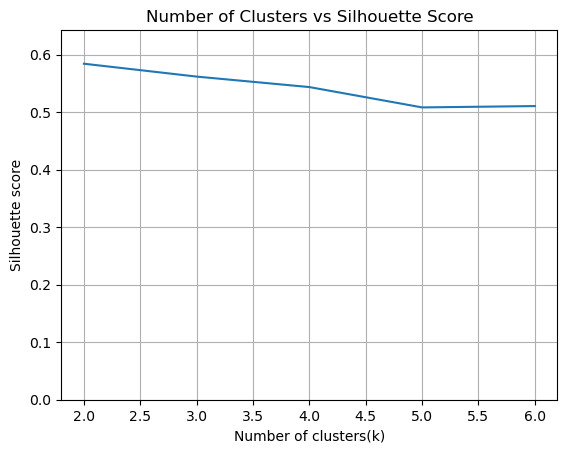

In [24]:
ax = df_sils.plot(x='n_clusters', y='silhouette')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette score')
plt.ylim((0, 1.1 * df_sils.silhouette.max()))
plt.grid(True)
ax.legend().set_visible(False)
plt.title("Number of Clusters vs Silhouette Score");

In [33]:
# 2.3)
df_pca_sils = pd.DataFrame.from_dict(pcas)
df_pca_sils.index = clusters_list
df_pca_sils.index.name = 'Number of clusters'
df_pca_sils = df_pca_sils.rename_axis('PCA Components', axis='columns')
df_pca_sils

PCA Components,2,3,4,5,6
Number of clusters,,,,,
2,0.619442,0.599961,0.589955,0.587472,0.585963
3,0.611625,0.586609,0.570949,0.567470,0.564725
4,0.600752,0.570531,0.553715,0.549286,0.546752
5,0.567088,0.545911,0.521348,0.515809,0.512537
6,0.569320,0.550951,0.529829,0.524216,0.515274


**Question**: Which combination of number of clusters and number of components produced the best results? What is the silhouette score for this combination? **(3 marks)**

The best result was a silhouette score of 0.619 from using 2 PCA components and 2 clusters

## 3. Improve results (Bonus - 3 marks)

Think about how you could improve the results from the previous section. Two potential methods include preprocessing the data or selecting a different clustering algorithm. Repeat section 2 with your selected improvement method to determine what the new silhouette scores would be

In [43]:

# Scale data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ceramic_data)

df_cscaled = pd.DataFrame(scaler.transform(ceramic_data), columns=ceramic_data.columns)
df_cscaled.head()


,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,0.427622,-0.234390,0.459539,0.790484,-0.158280,-0.902027,-0.588232,-0.635104,-0.309051,-1.101185,-0.751771,-1.078864,1.722268,-0.898362,-0.230713,-1.095794,-0.876485
1,0.283443,0.186555,0.797390,0.096720,0.001819,-0.859984,-0.211763,-0.734965,-0.718390,-0.574531,-0.455108,0.055877,1.722268,-0.937615,-0.230713,-0.760968,-0.826530
2,0.052756,-1.123051,0.243571,1.780011,-1.724969,-0.873998,-0.776466,-0.818183,-0.652896,-0.574531,-1.345098,0.434125,1.001928,-0.741349,-0.230713,-1.095794,-0.601732
3,1.206188,-0.608563,0.117412,1.593790,-1.107442,-0.911370,-0.211763,-0.551886,-0.587402,-0.574531,-0.751771,0.812372,1.001928,-0.859108,-0.230713,-1.263207,-0.576754
4,-1.273690,-0.327933,0.202944,1.520763,-0.741500,-0.822611,-0.964700,-0.618460,-0.718390,0.478776,-0.158445,0.055877,0.713792,-0.859108,-1.011586,-1.095794,-0.726619


In [44]:
# Implement clustering with scaled data 

sils = []
clusters_list = range(2, 7)
for n_clusters in clusters_list:
    cluster_fn(df_cscaled, n_clusters)
    sils.append(cluster_fn(df_cscaled, n_clusters))

In [ ]:
# Cluster using PCA tranformed data
# pca_components_list = range(2, 7)
# clusters_list = range(2, 7)

# scaled_pcas = {}


# for n_components in pca_components_list:
#     sils = []
#     pcas = PCA(n_components=n_components)
    
#     # fit and transform the scaled data on the pca components
#     pcas.fit(df_cscaled)
#     X_pca = pcas.transform(df_cscaled)
    
#     for n_clusters in clusters_list:
#         kmeans = KMeans(n_clusters=n_clusters, random_state=4).fit(X_pca)
#         sils.append(silhouette_score(X_pca, kmeans.labels_))
#     scaled_pcas[n_components] = sils

In [53]:
# Cluster using PCA tranformed data

pca_components_list = range(2, 7)
clusters_list = range(2, 7)

scaled_pcas = {}

for n_components in pca_components_list:
    sils_scores = []
    for n_clusters in clusters_list:
        sil = cluster_fn(ceramic_data, n_clusters, n_components)
        sils_scores.append(sil)
    scaled_pcas[n_components] = sils_scores

In [46]:
# Display results
# 3.2.1)
df_scaled_sils = pd.DataFrame({'n_clusters': clusters_list, 'silhouette': sils})
df_scaled_sils

,n_clusters,silhouette
0,2,0.286008
1,3,0.268343
2,4,0.242909
3,5,0.231110
4,6,0.221541


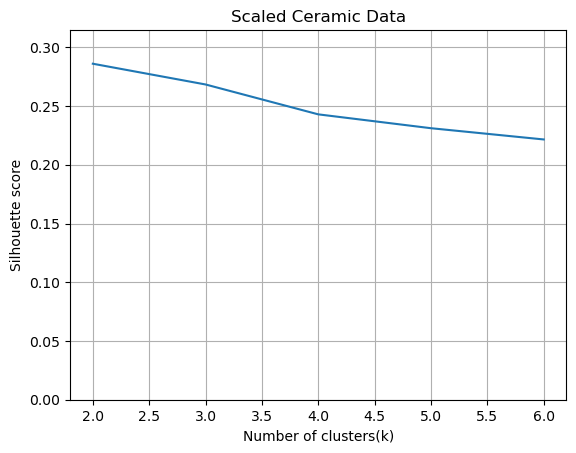

In [47]:
ax = df_scaled_sils.plot(x='n_clusters', y='silhouette')

plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette score')
plt.ylim((0, 1.1 * df_scaled_sils.silhouette.max()))
plt.grid(True)
ax.legend().set_visible(False)
plt.title("Scaled Ceramic Data");

In [49]:
# 3.2.3)
df_scaled_pca_sils = pd.DataFrame.from_dict(scaled_pcas)
df_scaled_pca_sils.index = clusters_list
df_scaled_pca_sils.index.name = 'Number of clusters'
df_scaled_pca_sils = df_scaled_pca_sils.rename_axis('PCA Components', axis='columns')
df_scaled_pca_sils

PCA Components,2,3,4,5,6
Number of clusters,,,,,
2,0.619442,0.599961,0.589955,0.587472,0.585963
3,0.611625,0.586609,0.570949,0.567470,0.564725
4,0.600752,0.570531,0.553715,0.549286,0.546752
5,0.567088,0.545911,0.521348,0.515809,0.512537
6,0.569320,0.550951,0.529829,0.524216,0.515274


**Question**: Why did you select this improvement method? Which combination of number of clusters and number of components produced the best results? Did you improve the silhouette scores? If yes, how much of an improvement did you get over the previous results?

*ANSWER HERE*